# EXPERIMENT - STATE-GROUP-1

# State Groups:

- `group_1`: Patients with low toxicity and low tumor size  - W_0 ~ N(0.5, 0.16**2), T_0 ~ N(0.5, 0.16**2)
- `group_2`: Patients with high toxicity and low tumor size - W_0 ~ N(1.5, 0.16**2), T_0 ~ N(0.5, 0.16**2)
- `group_3`: Patients with low initial toxicity and high tumor size - W_0 ~ N(0.5, 0.16**2), T_0 ~ N(1.5, 0.16**2)
- `group_4`: Patients with high toxicity and high tumor size - W_0 ~ N(1.5, 0.16**2), T_0 ~ N(1.5, 0.16**2)
-  `None`  : Patients with toxicity and tumor size sample from - W_0 ~ U(0,2), T_0 ~  U(0,2)

In [19]:
%load_ext autoreload
%autoreload 2

import tqdm
import _set_path
from pbpi.algo_core.training import evaluations_per_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
ALGO_TYPE = {'original': {'name': 'original', 'exploration': False}
            ,'modified': {'name': 'modified', 'exploration': True} }

---
## Using `tumor size + toxicity` to generate preferences

### Original algorithm

In [21]:
############################################
################## INPUTS ##################

# Configs to test
N_STATES = 250

configs = { 'CONFIG_NO': 3
          , 'S': [N_STATES]
          , 'Actions' : [6]
          , 'Roll-outs': [10]
          , 'Significance' : [0.1]
          , 'init_state_group': 'group_1'
          , 'init_state_tag': 'g1'
          }

algorithm = ALGO_TYPE['original']

############################################
############################################

# Algorithm configs
ALGO_NAME = algorithm['name']
EXPLORE_LOGIC = algorithm['exploration']

Runs:   0%|          | 0/1 [00:00<?, ?it/s]
State generation seed is 16


Currently evaluated configs:
 Samples: 250 | Actions: 6 | Roll-outs: 10 | Significance: 0.1


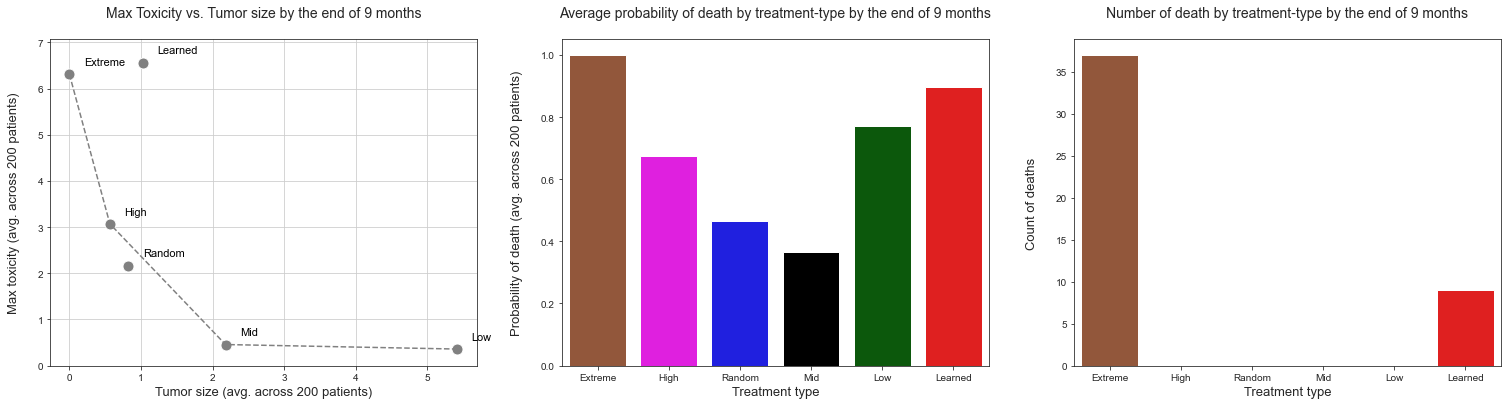

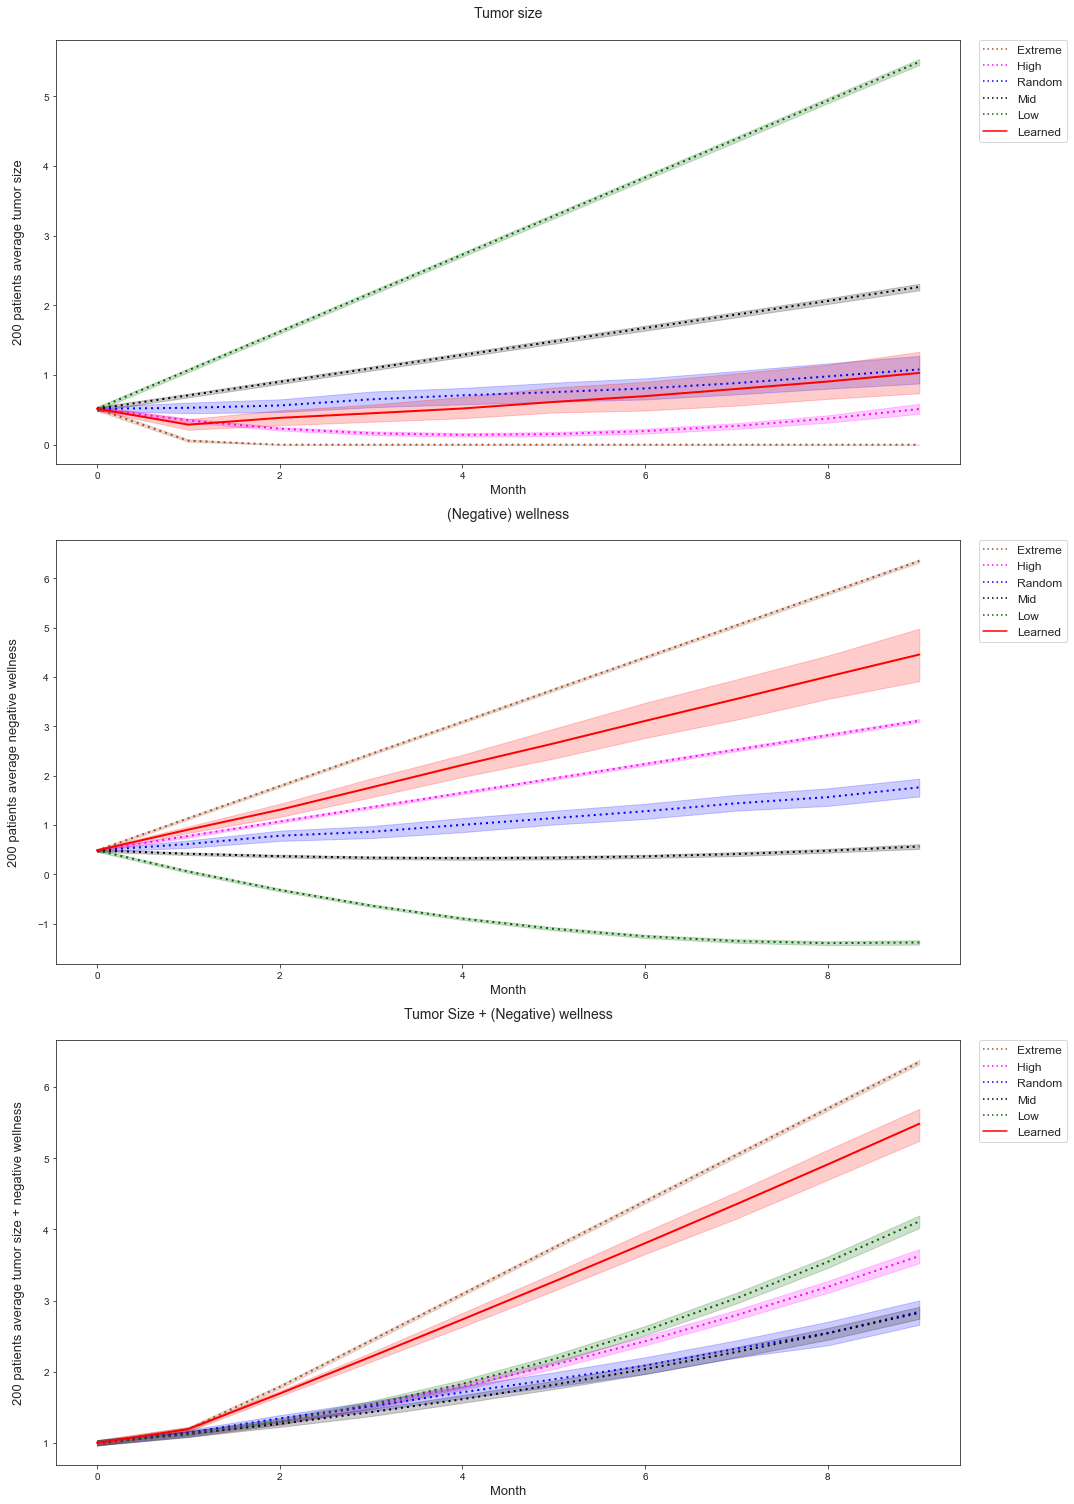


Policy Iteration: 1 - Evaluation results:
                         - Avg. ending tumor size : 1.029843322174112
                         - Avg. max. toxicity : 6.564006051343307
                         - Avg. tumor size + toxicity (at the end of 9 months): 2.4155165267682133
                         - Avg. prob. of death : 0.8980715957093135



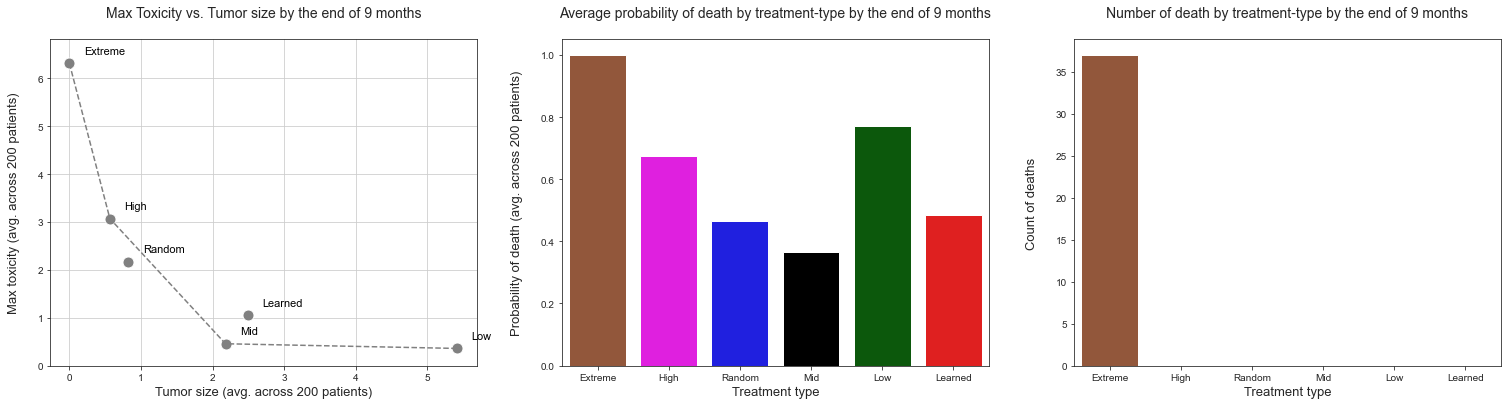

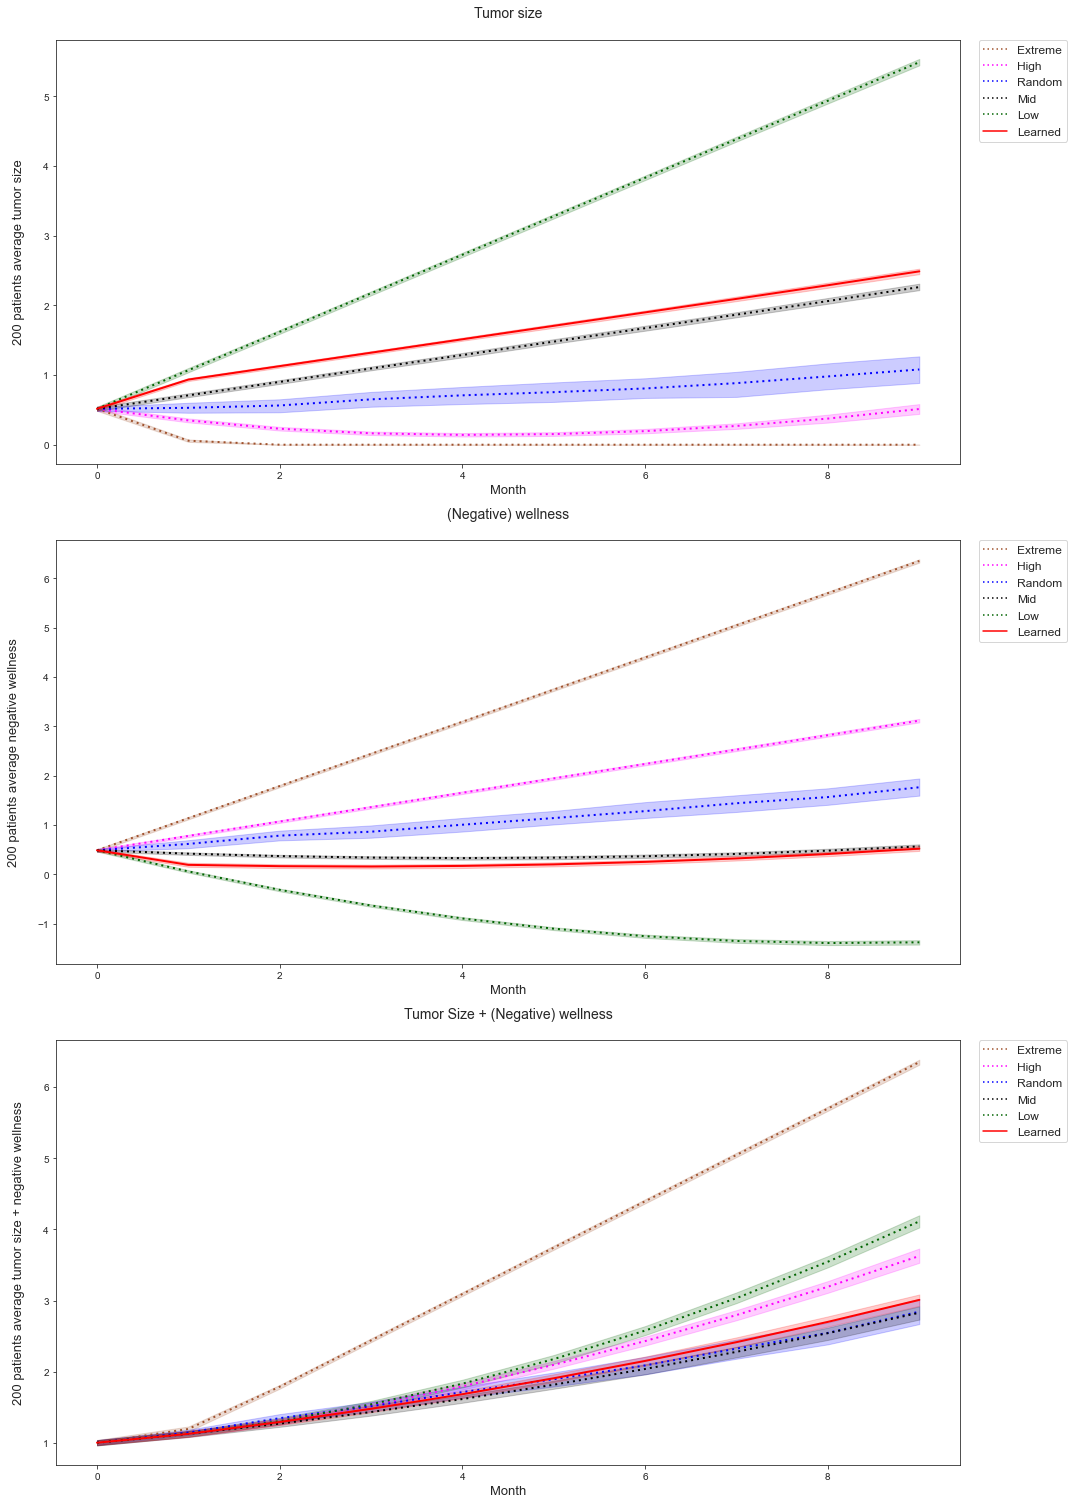


Policy Iteration: 2 - Evaluation results:
                         - Avg. ending tumor size : 2.48888303559815
                         - Avg. max. toxicity : 1.046439970835907
                         - Avg. tumor size + toxicity (at the end of 9 months): 2.217182398791357
                         - Avg. prob. of death : 0.48438373207600904



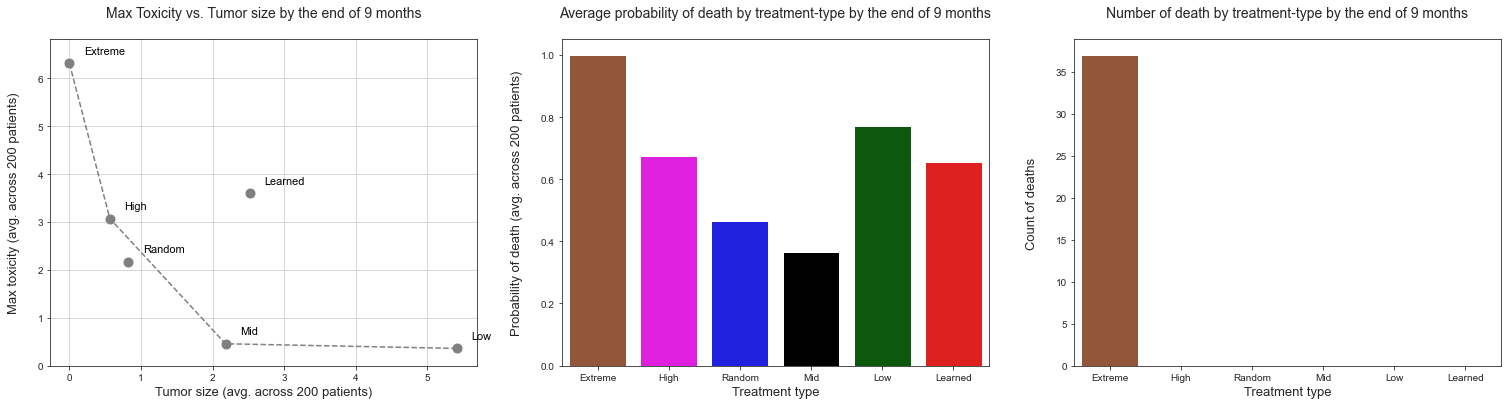

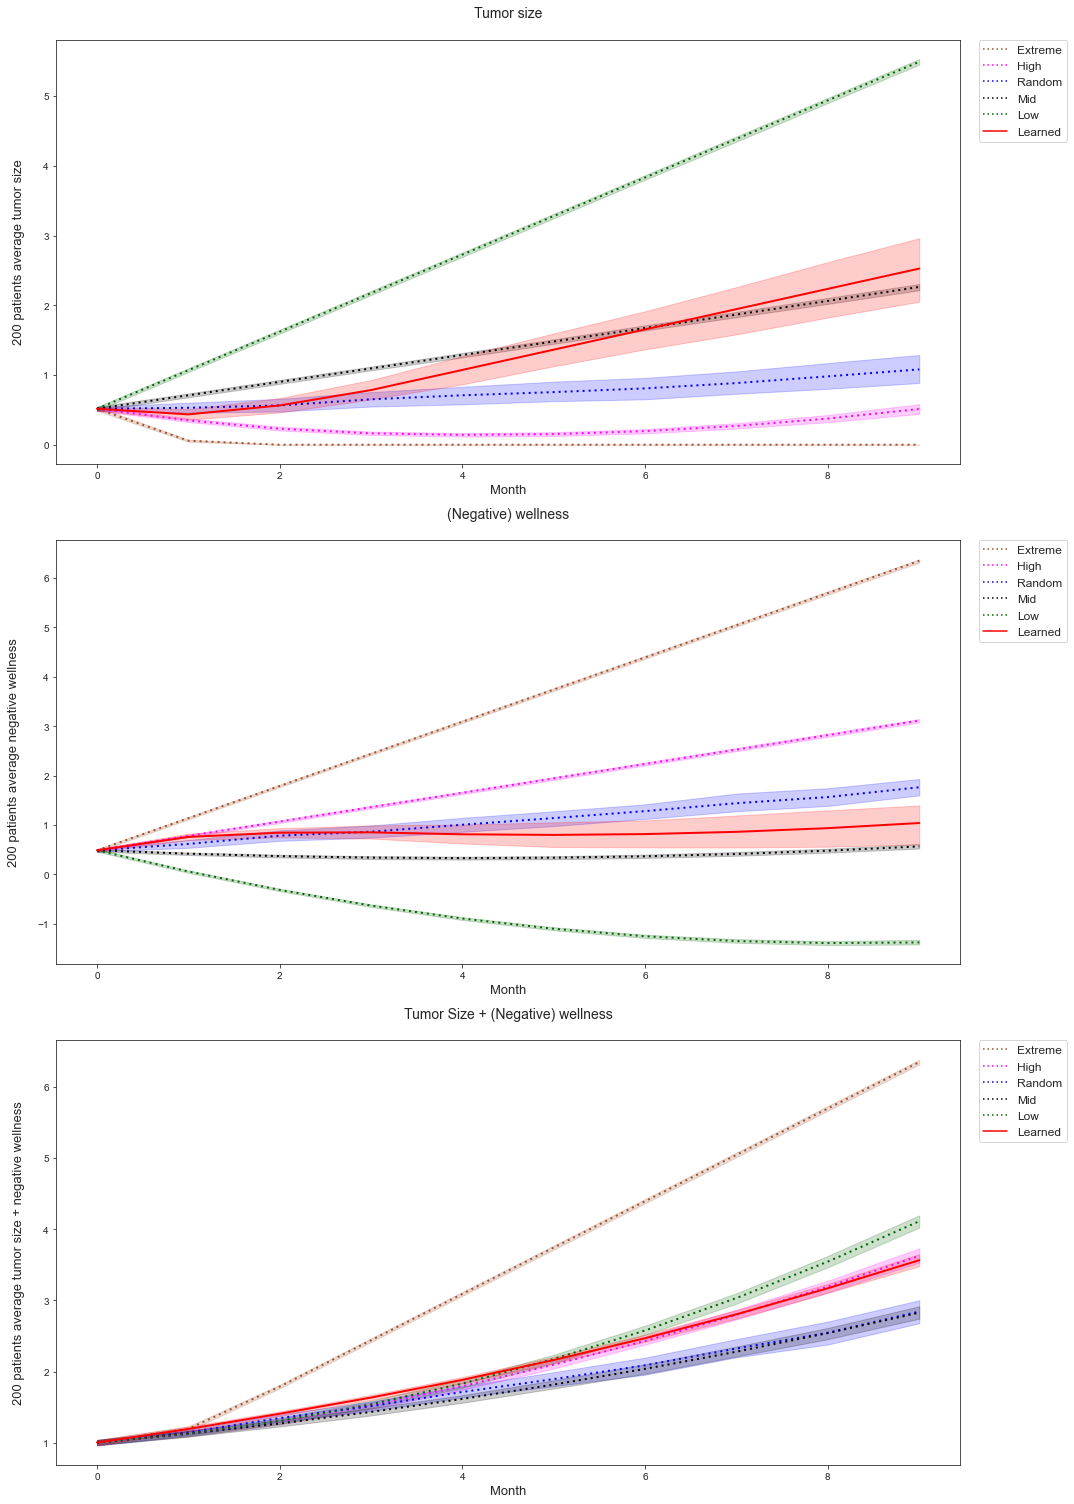


Policy Iteration: 3 - Evaluation results:
                         - Avg. ending tumor size : 2.526316124100573
                         - Avg. max. toxicity : 3.598556917328194
                         - Avg. tumor size + toxicity (at the end of 9 months): 2.259301578829505
                         - Avg. prob. of death : 0.6548316306092562

Averege death rate increased by 20%! Policy performance decreased! Run-1 terminated!

Evaluations: 100%|██████████| 1/1 [24:02<00:00, 1442.14s/it]


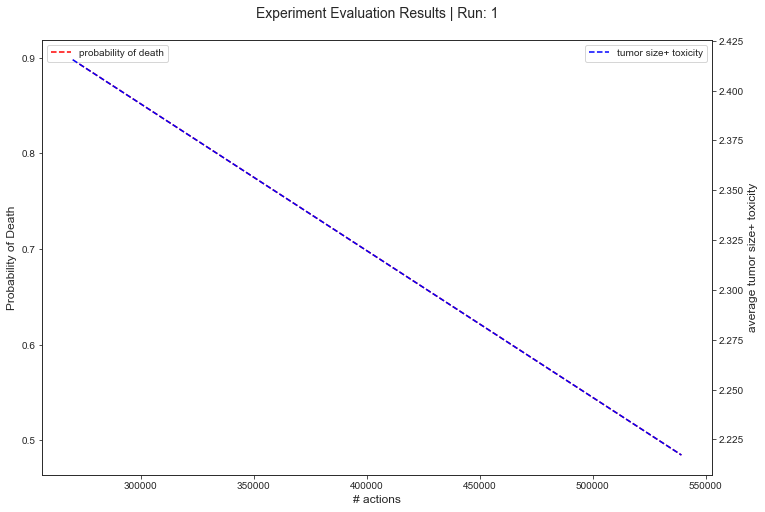

In [22]:
# Experiment execution
agg_results = []

eval_count = len(configs['S'])*len(configs['Actions'])*len(configs['Roll-outs'])*len(configs['Significance'])

pbar_evals = tqdm.tqdm(total=eval_count, desc="Evaluations")

for sample_size in configs['S']:
        
    for rollout_max in configs['Roll-outs']:

        for sig_lvl in configs['Significance']:

            run_results = evaluations_per_config(s_size                     = sample_size
                                                , init_state_group          = configs['init_state_group']

                                                , n_actions                 = configs['Actions'][0]
                                                , max_n_rollouts            = rollout_max
                                                , sig_lvl                   = sig_lvl

                                                , treatment_length_train    = 9
                                                , treatment_length_eval     = 9
                                                
                                                , max_policy_iter_per_run   = 10 # Maximum number of policy iterations per experiment
                                                , runs_per_config           = 1  # Number of experiments per one parameter config

                                                , eval_runs_per_state       = 1  # Episodes to generate from each init. state during evaluation phrase
                                                
                                                , off_policy_explr          = EXPLORE_LOGIC # What algorithm to use

                                                , rollout_tracking          = False # Show rollout info.
                                                , dataset_tracking          = False # Show train dataset

                                                , train_plot_tracking       = False # Show model training plot
                                                , eval_summary_tracking     = True  # Show a policy performance summary of evaluation runs
                                                , policy_behaviour_tracking = False # Show/store policy action selections vs. pendulum angle plot

                                                , show_experiment_run_eval_summary_plot = False # Show death-rate/tumor-size+toxicity vs. action no. plot of exp. run

                                                , use_toxi_n_tumor_for_pref = True # Generate preferences using sum(max-toxi, tumor-size) of rollouts
                                                , set_seed                  = 16
                                                , init_state_tag            = configs['init_state_tag']
                                                )

            agg_results.append(run_results)

            pbar_evals.update(1)
                
pbar_evals.close()

### Modified algorithm

In [23]:
############################################
################## INPUTS ##################

# Configs to test
N_STATES = 250

configs = { 'CONFIG_NO': 2
          , 'S': [N_STATES]
          , 'Actions' : [6]
          , 'Roll-outs': [10]
          , 'Significance' : [0.1]
          , 'init_state_group': 'group_1'
          , 'init_state_tag': 'g1'
          }

algorithm = ALGO_TYPE['modified']

############################################
############################################

# Algorithm configs
ALGO_NAME = algorithm['name']
EXPLORE_LOGIC = algorithm['exploration']

Runs:   0%|          | 0/1 [00:00<?, ?it/s]
State generation seed is 16


Currently evaluated configs:
 Samples: 250 | Actions: 6 | Roll-outs: 10 | Significance: 0.1


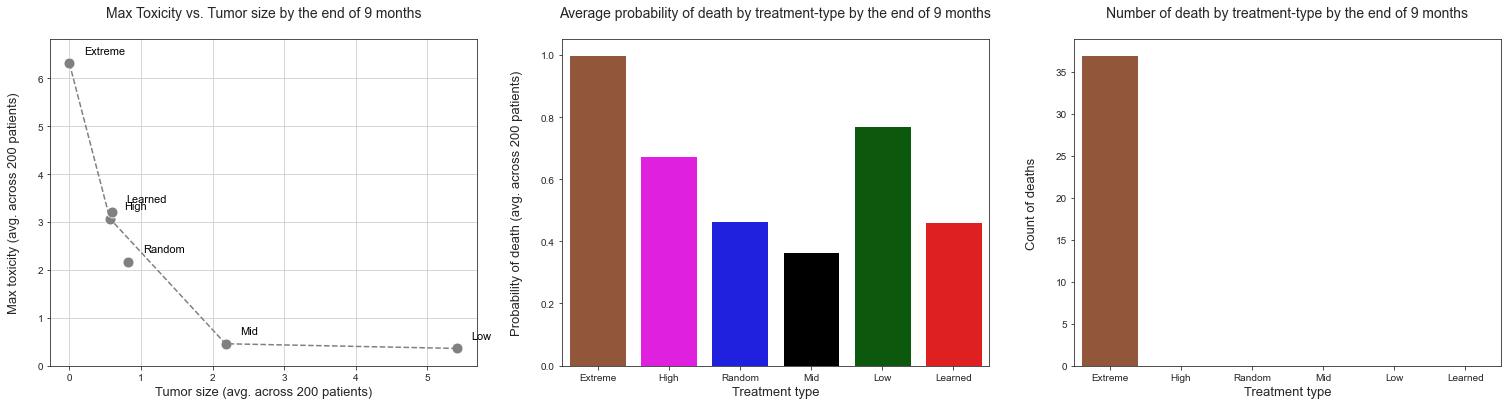

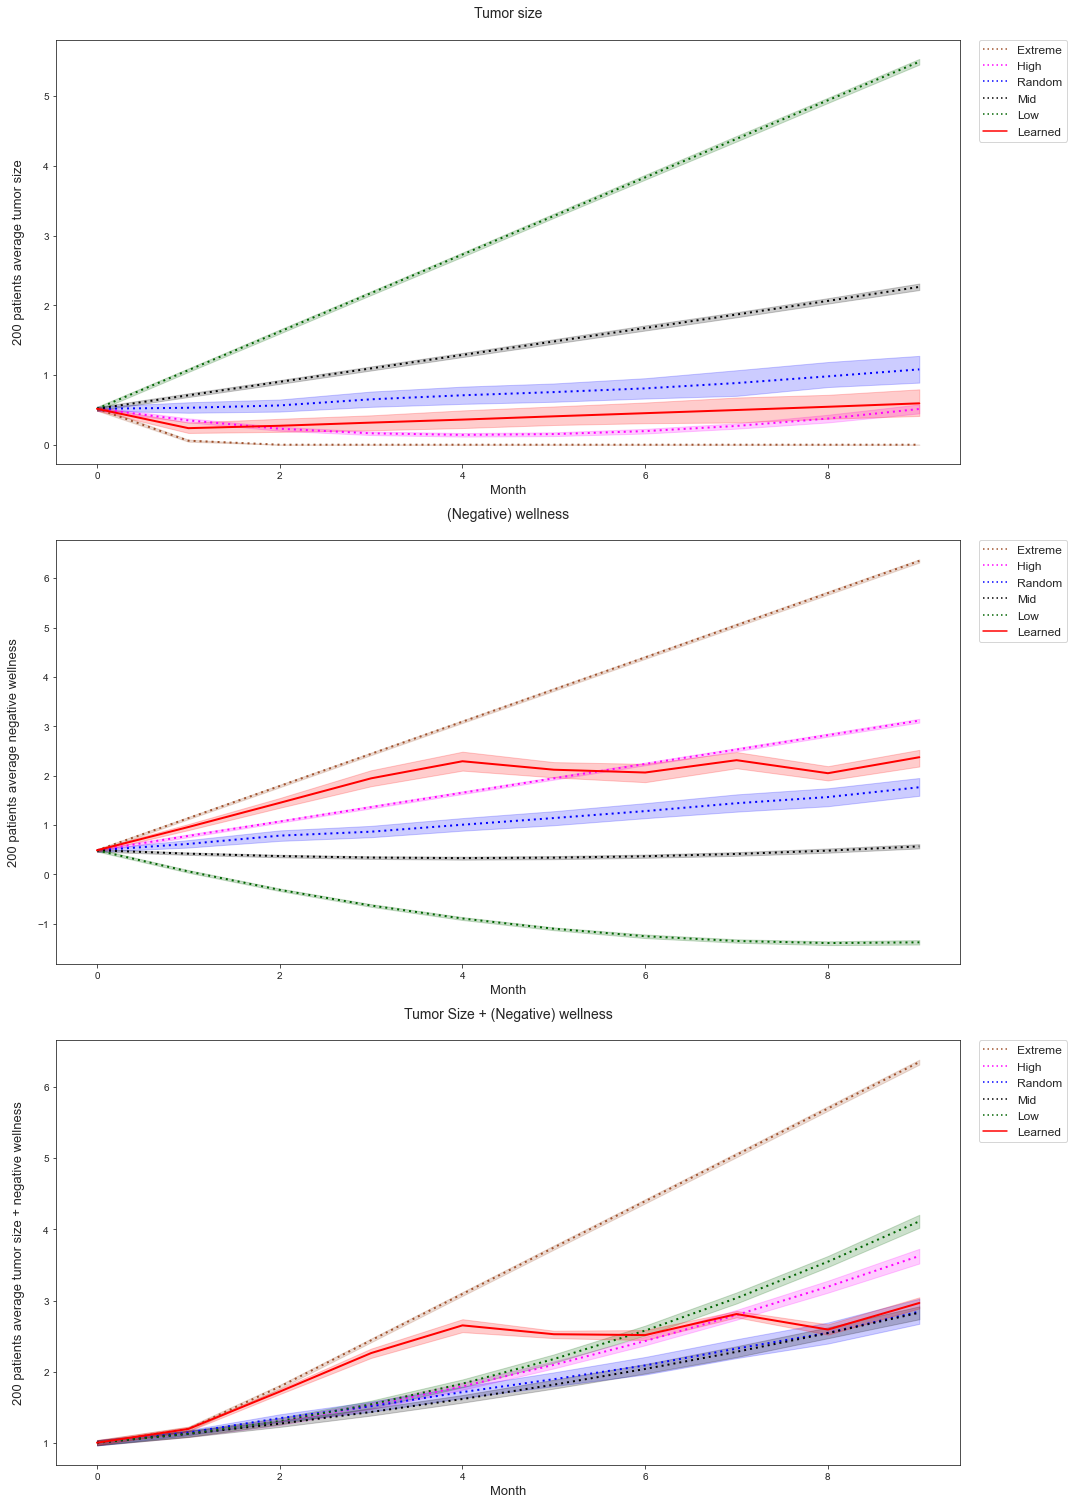


Policy Iteration: 1 - Evaluation results:
                         - Avg. ending tumor size : 0.5933160649608166
                         - Avg. max. toxicity : 3.2145911131861986
                         - Avg. tumor size + toxicity (at the end of 9 months): 2.27501171115295
                         - Avg. prob. of death : 0.4625056382492117



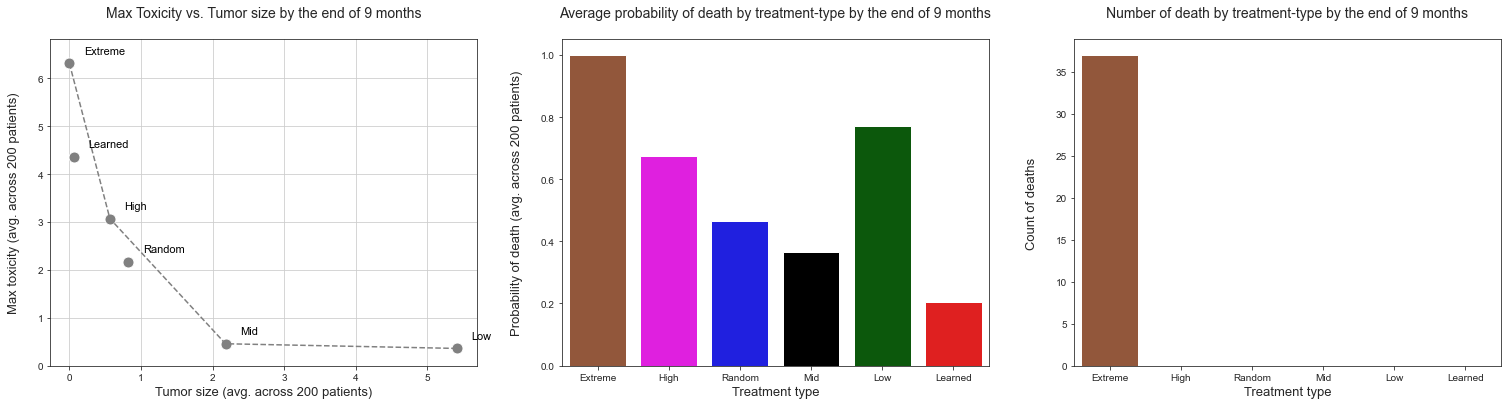

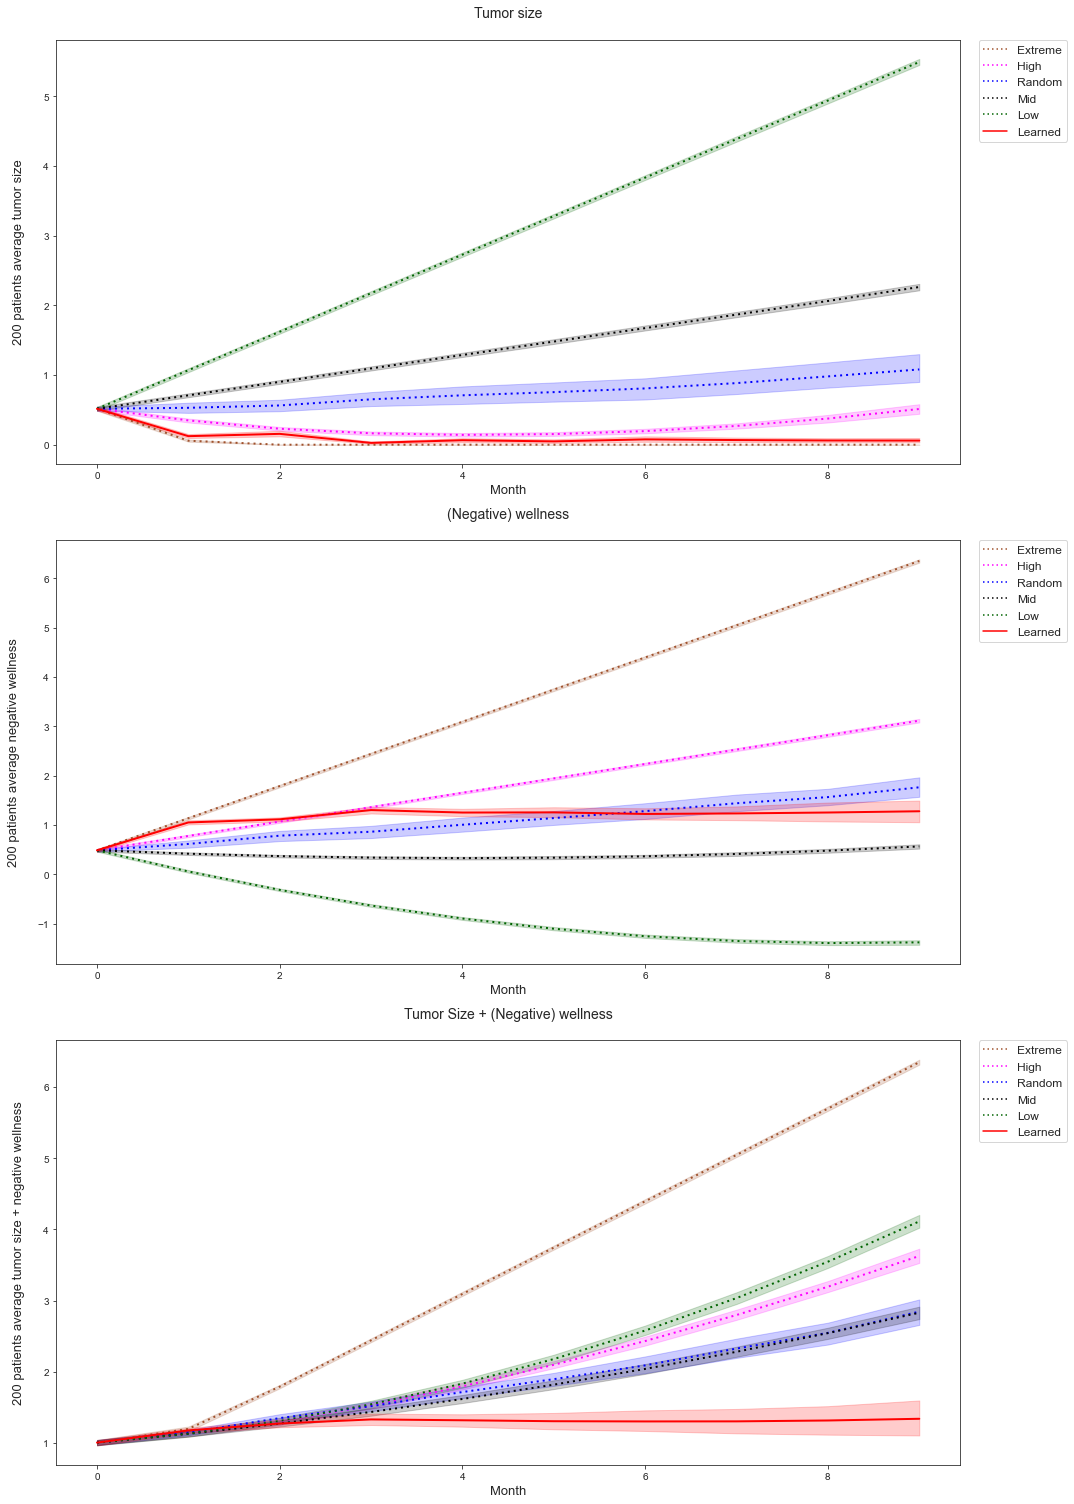


Policy Iteration: 2 - Evaluation results:
                         - Avg. ending tumor size : 0.05916859695366003
                         - Avg. max. toxicity : 4.359503106130324
                         - Avg. tumor size + toxicity (at the end of 9 months): 2.115149547416158
                         - Avg. prob. of death : 0.20493245112871925



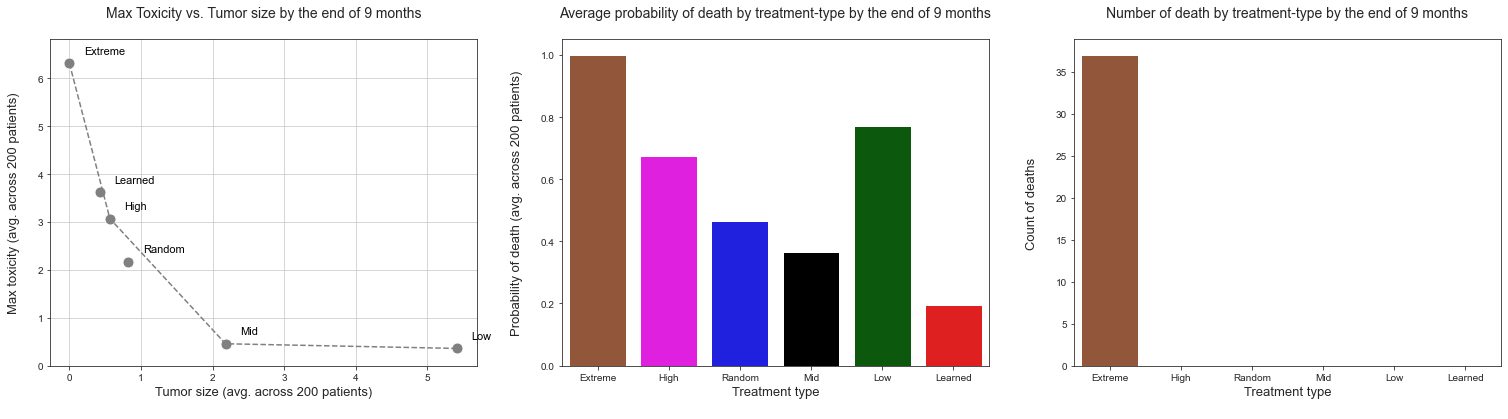

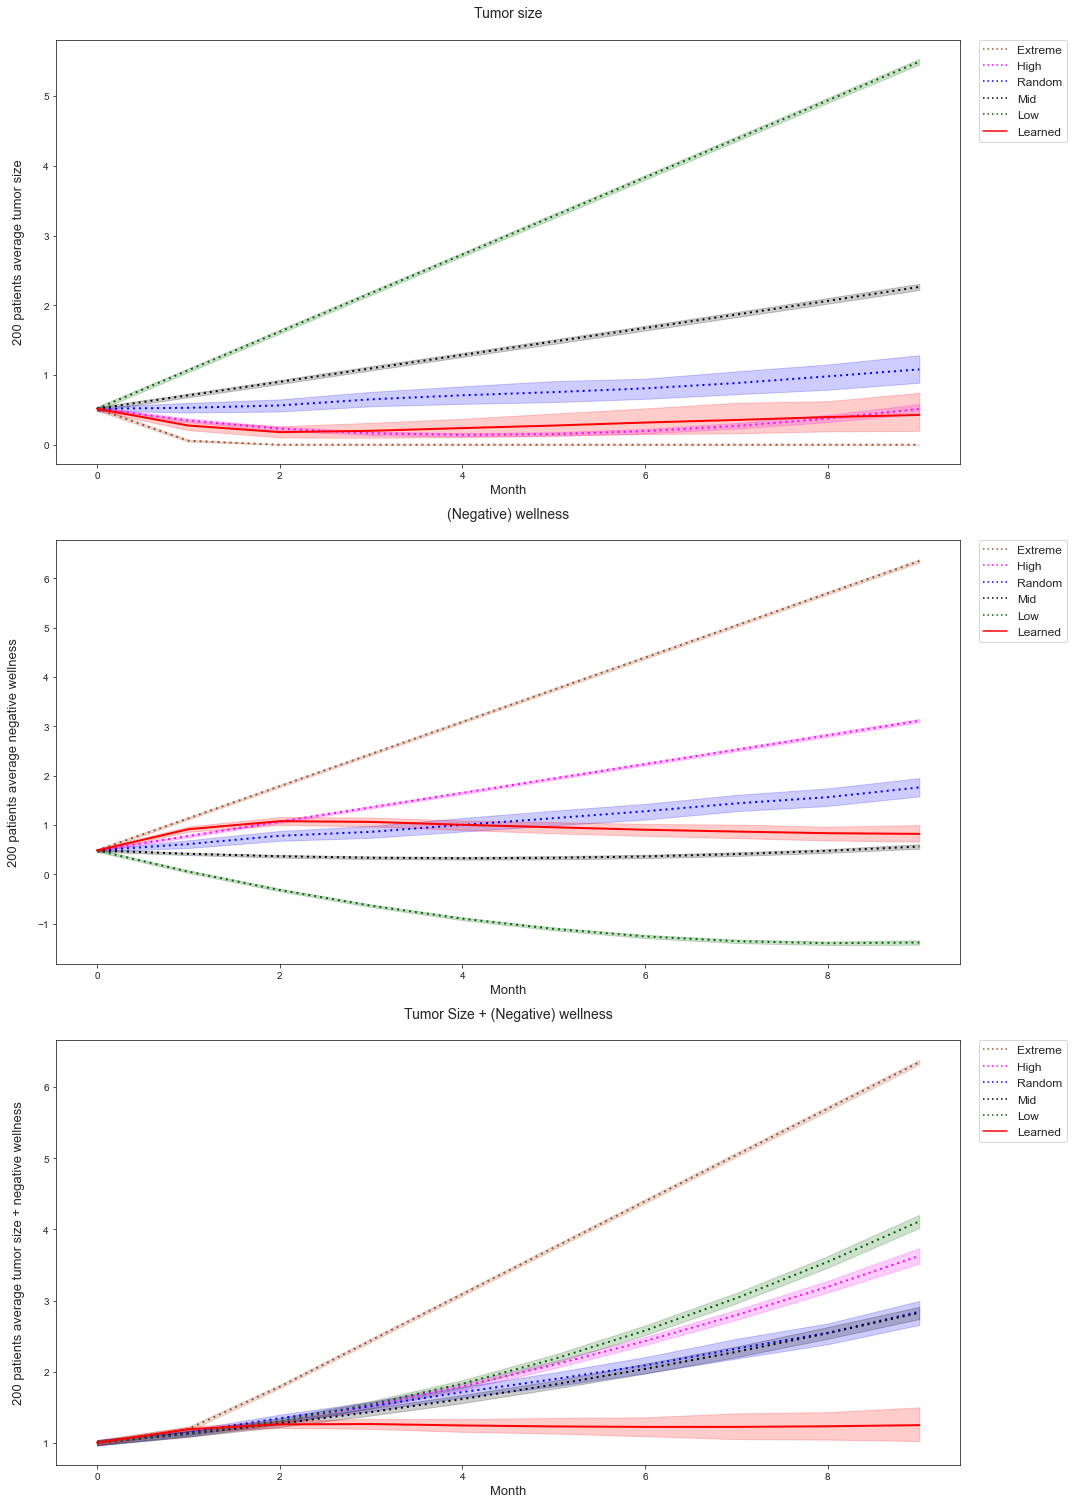


Policy Iteration: 3 - Evaluation results:
                         - Avg. ending tumor size : 0.4265590592539651
                         - Avg. max. toxicity : 3.6192793809945805
                         - Avg. tumor size + toxicity (at the end of 9 months): 2.1064006793461987
                         - Avg. prob. of death : 0.1940853534362553



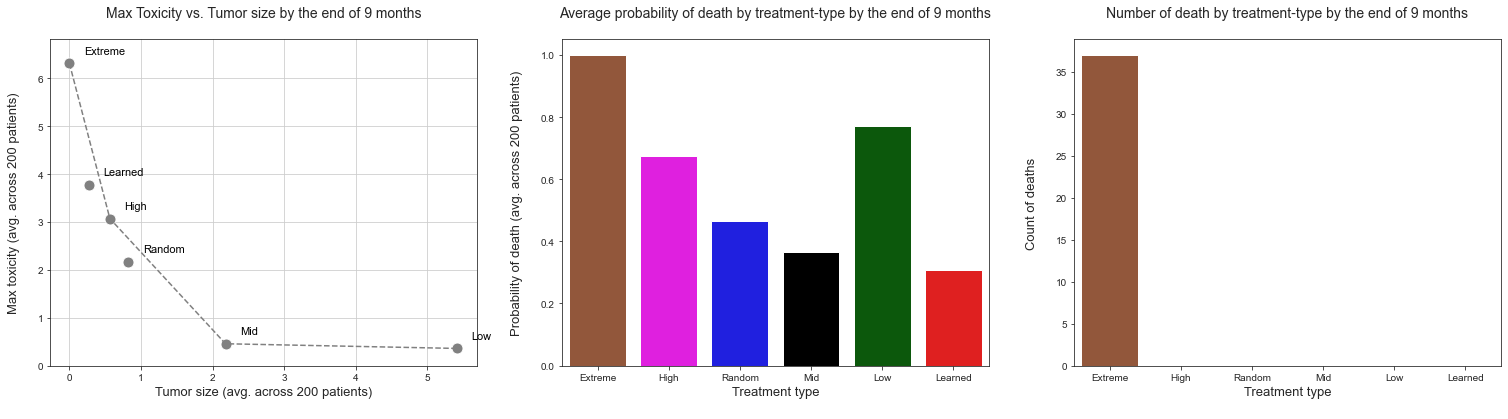

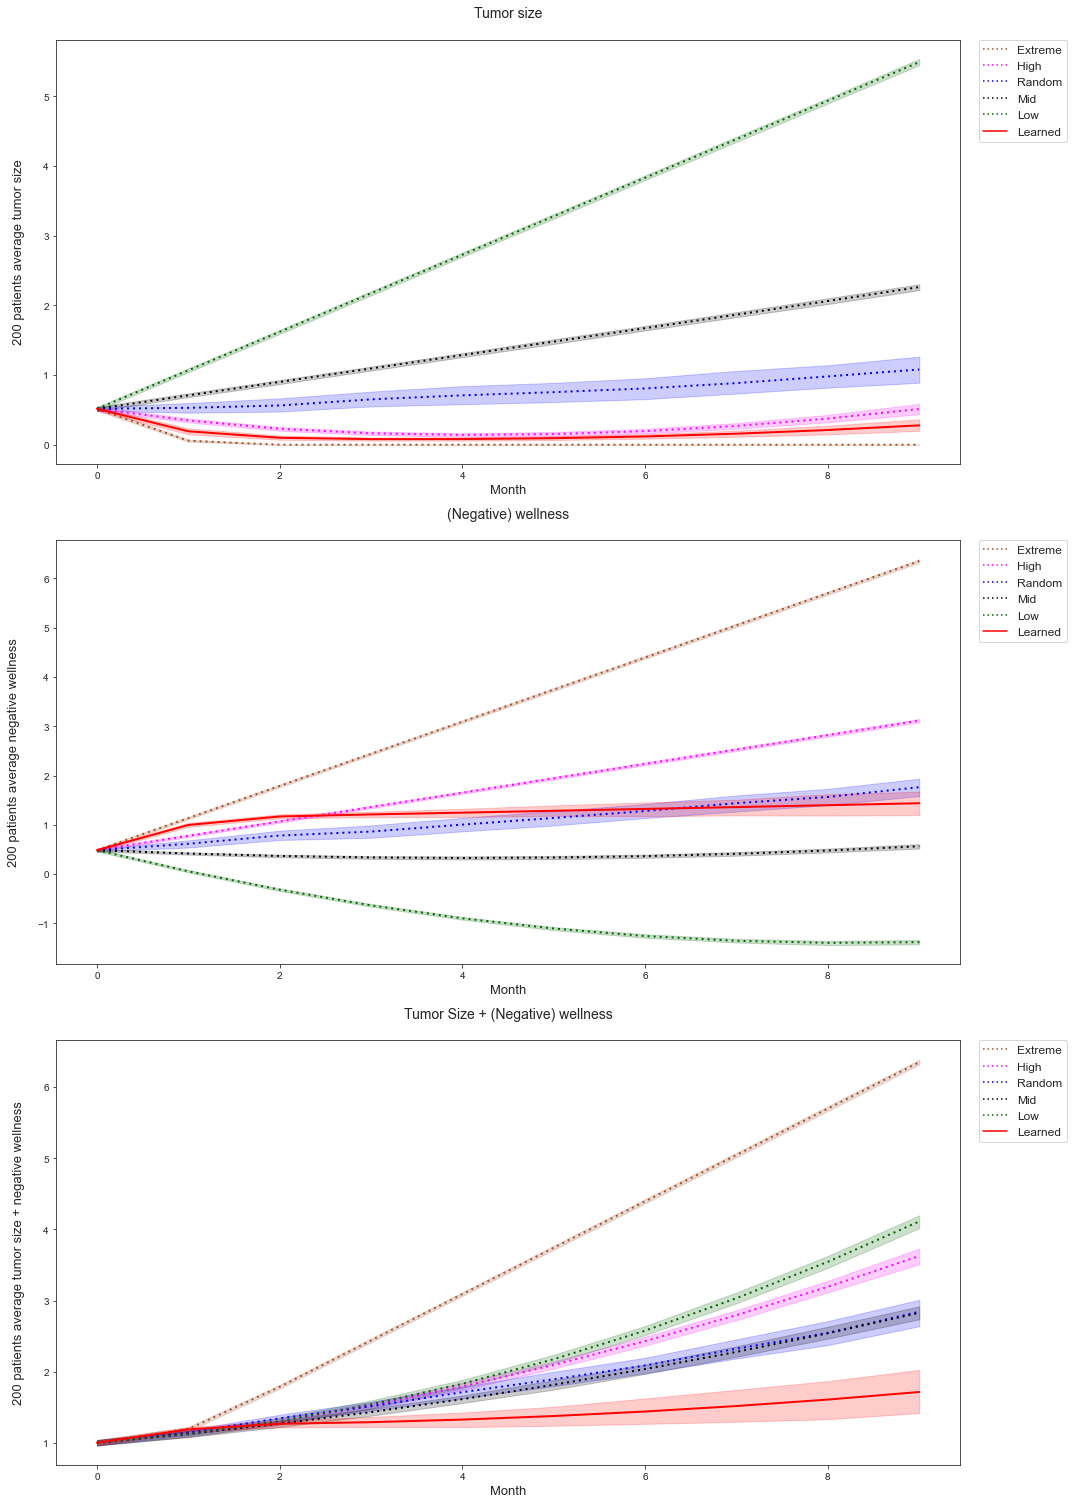


Policy Iteration: 4 - Evaluation results:
                         - Avg. ending tumor size : 0.27780375651977385
                         - Avg. max. toxicity : 3.7762467770391703
                         - Avg. tumor size + toxicity (at the end of 9 months): 2.1334601103978033
                         - Avg. prob. of death : 0.30636981913341843

Averege death rate increased by 20%! Policy performance decreased! Run-1 terminated!

Evaluations: 100%|██████████| 1/1 [26:58<00:00, 1618.13s/it]


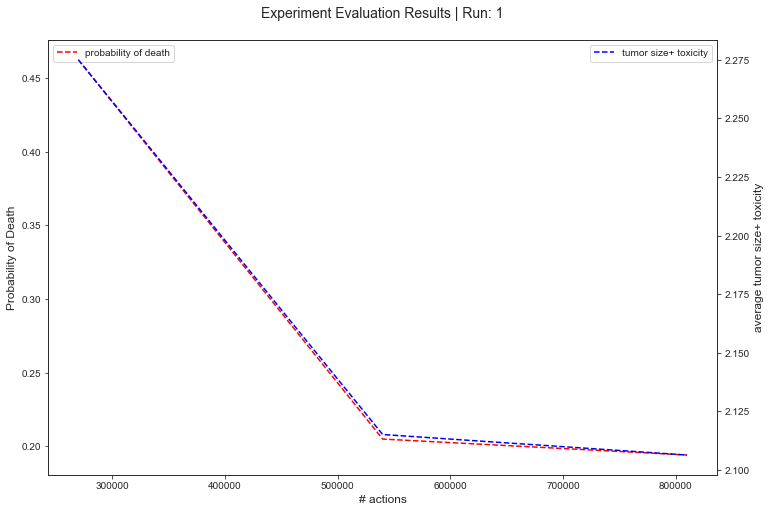

In [24]:
# Experiment execution
agg_results = []

eval_count = len(configs['S'])*len(configs['Actions'])*len(configs['Roll-outs'])*len(configs['Significance'])

pbar_evals = tqdm.tqdm(total=eval_count, desc="Evaluations")

for sample_size in configs['S']:
        
    for rollout_max in configs['Roll-outs']:

        for sig_lvl in configs['Significance']:

            run_results = evaluations_per_config(s_size                     = sample_size
                                                , init_state_group          = configs['init_state_group']

                                                , n_actions                 = configs['Actions'][0]
                                                , max_n_rollouts            = rollout_max
                                                , sig_lvl                   = sig_lvl

                                                , treatment_length_train    = 9
                                                , treatment_length_eval     = 9
                                                
                                                , max_policy_iter_per_run   = 10 # Maximum number of policy iterations per experiment
                                                , runs_per_config           = 1  # Number of experiments per one parameter config

                                                , eval_runs_per_state       = 1  # Episodes to generate from each init. state during evaluation phrase
                                                
                                                , off_policy_explr          = EXPLORE_LOGIC # What algorithm to use

                                                , rollout_tracking          = False # Show rollout info.
                                                , dataset_tracking          = False # Show train dataset

                                                , train_plot_tracking       = False # Show model training plot
                                                , eval_summary_tracking     = True  # Show a policy performance summary of evaluation runs
                                                , policy_behaviour_tracking = False # Show/store policy action selections vs. pendulum angle plot

                                                , show_experiment_run_eval_summary_plot = False # Show death-rate/tumor-size+toxicity vs. action no. plot of exp. run

                                                , use_toxi_n_tumor_for_pref = True # Generate preferences using sum(max-toxi, tumor-size) of rollouts
                                                , set_seed                  = 16
                                                , init_state_tag            = configs['init_state_tag']
                                                )

            agg_results.append(run_results)

            pbar_evals.update(1)
                
pbar_evals.close()